In [6]:
import pandas as pd
import numpy as np

In [2]:
sad1 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\sad\crying_myself_to_sleep__sad_songs.csv")

In [3]:
sad2 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\sad\english_sad_songs_.csv")

In [4]:
sad3 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\sad\songs_that_will_100_make_you_cry_.csv")

In [5]:
sad4 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\sad\songs_to_cry_to_alone_in_your_room_at_3am.csv")

In [6]:
sad5 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\sad\the_saddest_playlist_on_spotify.csv")

In [7]:
sad = pd.concat([sad1,sad2,sad3,sad4,sad5])

In [8]:
sad.head()

,Spotify ID,Artist IDs,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Added By,Added At,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,042Sl6Mn83JHyLEqdK7uI0,6qqNVTkY8uBg9cP3Jd7DAH,Your Power,Happier Than Ever,Billie Eilish,2021-07-30,245896,72,spotify:user:biels09,2024-05-02T14:01:10Z,...,9,-14.025,0,0.0801,0.932,0.000476,0.233,0.208,129.642,4
1,7vRriwrloYVaoAe3a9wJHe,"3iri9nBFs9e4wN7PLIetAw,1QRj3hoop9Mv5VvHQkwPEp","i hate u, i love u (feat. olivia o'brien)",us,"gnash,Olivia O'Brien",2016-03-25,251033,74,spotify:user:biels09,2024-05-02T14:01:10Z,...,6,-13.400,0,0.3000,0.687,0.000000,0.101,0.180,92.600,4
2,4Of7rzpRpV1mWRbhp5rAqG,4GNC7GD6oZMSxPGyXy4MNB,Bruises,Divinely Uninspired To A Hellish Extent,Lewis Capaldi,2019-05-17,220492,78,spotify:user:biels09,2024-05-02T14:01:10Z,...,4,-7.830,1,0.0677,0.946,0.000000,0.186,0.361,111.202,4
3,4CxFN5zON70B3VOPBYbd6P,"3gIRvgZssIb9aiirIg0nI3,5JMLG56F1X5mFmWNmS0iAp",you were good to me,brent,"Jeremy Zucker,Chelsea Cutler",2019-05-03,219146,70,spotify:user:biels09,2024-05-02T14:01:10Z,...,2,-15.099,1,0.0404,0.913,0.000026,0.112,0.206,102.128,4
4,4dnmtQPnXU993aEUGp0bY8,1McMsnEElThX1knmY4oliG,drivers license,drivers license,Olivia Rodrigo,2021-01-08,242013,14,spotify:user:biels09,2024-05-02T14:01:10Z,...,10,-8.821,1,0.0550,0.739,0.000015,0.112,0.150,144.004,4


In [9]:
sad = sad[['Track Name','Album Name','Artist Name(s)']]

In [10]:
sad.rename(columns={'Track Name': 'trackName', 'Album Name': 'albumName', 'Artist Name(s)': 'albumArtistsName'}, inplace=True)

In [11]:
sad['mood'] = 'Sad'

In [3]:
def fetch_lyrics(artist_name, track_name):
    try:
        artist = genius.search_artist(artist_name, max_songs=0, sort='title')
        song = artist.song(track_name)
        return song.lyrics if song else None
    except Exception as e:
        print(f"Error fetching lyrics for {artist_name} - {track_name}: {e}")
        return None

In [4]:
def add_lyrics_to_dataframe(df, artist_col='albumArtistsName', track_col='trackName', lyrics_col='lyrics'):
    df[lyrics_col] = df.apply(lambda row: fetch_lyrics(row[artist_col], row[track_col]), axis=1)
    return df

In [ ]:
num_duplicates = sad.duplicated(subset=['trackName']).sum()

In [28]:
print(f'Number of duplicate entries in the "trackName" column: {num_duplicates}')

Number of duplicate entries in the "trackName" column: 0


In [30]:
sad.shape

(679, 4)

In [17]:
sad = sad.drop_duplicates(subset=['trackName'])
sad = sad.reset_index(drop=True)

In [18]:
sad.shape

(679, 4)

In [6]:
import lyricsgenius

In [7]:
api_key = "U-frco-14QLRSdsrBbvnFh1leqrwYaQNq7KFXfJTFgBubwYqOchlMdrxDhyW-jf_"
genius = lyricsgenius.Genius(api_key)

In [34]:
data_with_lyrics = add_lyrics_to_dataframe(sad)

Searching for songs by Billie Eilish...

Done. Found 0 songs.
Searching for "Your Power" by Billie Eilish...
Done.
Searching for songs by gnash,Olivia O'Brien...

No results found for 'gnash,Olivia O'Brien'.
Error fetching lyrics for gnash,Olivia O'Brien - i hate u, i love u (feat. olivia o'brien): 'NoneType' object has no attribute 'song'
Searching for songs by Lewis Capaldi...

Done. Found 0 songs.
Searching for "Bruises" by Lewis Capaldi...
Done.
Searching for songs by Jeremy Zucker,Chelsea Cutler...

Changing artist name to 'Jeremy Zucker & Chelsea Cutler'
Done. Found 0 songs.
Searching for "you were good to me" by Jeremy Zucker & Chelsea Cutler...
Done.
Searching for songs by Olivia Rodrigo...

Done. Found 0 songs.
Searching for "drivers license" by Olivia Rodrigo...
Done.
Searching for songs by Billie Eilish...

Done. Found 0 songs.
Searching for "What Was I Made For? [From The Motion Picture Barbie]" by Billie Eilish...
Done.
Searching for songs by Lana Del Rey...

Done. Found 0

In [36]:
sad.head()

,trackName,albumName,albumArtistsName,mood,lyrics
0,Your Power,Happier Than Ever,Billie Eilish,Sad,283 ContributorsTranslationsTürkçeEspañolРусск...
1,"i hate u, i love u (feat. olivia o'brien)",us,"gnash,Olivia O'Brien",Sad,None
2,Bruises,Divinely Uninspired To A Hellish Extent,Lewis Capaldi,Sad,73 ContributorsTranslationsSvenskaEspañolFranç...
3,you were good to me,brent,"Jeremy Zucker,Chelsea Cutler",Sad,50 ContributorsTranslationsTürkçeEspañolFrança...
4,drivers license,drivers license,Olivia Rodrigo,Sad,402 ContributorsTranslationsTürkçeEspañolРусск...


In [38]:
def clean_lyrics(lyrics):
    if pd.notna(lyrics):
        return lyrics.split('\n', 1)[-1]
    return lyrics

def clean_lyrics_column(df, lyrics_col='lyrics'):
    sad[lyrics_col] = sad[lyrics_col].apply(clean_lyrics)
    return sad

In [39]:
sad = clean_lyrics_column(sad)

In [40]:
sad.head()

,trackName,albumName,albumArtistsName,mood,lyrics
0,Your Power,Happier Than Ever,Billie Eilish,Sad,Try not to abuse your power\nI know we didn't ...
1,"i hate u, i love u (feat. olivia o'brien)",us,"gnash,Olivia O'Brien",Sad,None
2,Bruises,Divinely Uninspired To A Hellish Extent,Lewis Capaldi,Sad,"Counting days, counting days\nSince my love up..."
3,you were good to me,brent,"Jeremy Zucker,Chelsea Cutler",Sad,"Lyin' isn't better than silence\nFloatin', but..."
4,drivers license,drivers license,Olivia Rodrigo,Sad,I got my driver's license last week\nJust like...


In [41]:
null = sad.isnull().sum()
print(null)

trackName             0
albumName             0
albumArtistsName      0
mood                  0
lyrics              114
dtype: int64


In [42]:
sad = sad.dropna(subset=['lyrics'])
sad = sad[sad['lyrics'] != '']

In [43]:
sad.head()

,trackName,albumName,albumArtistsName,mood,lyrics
0,Your Power,Happier Than Ever,Billie Eilish,Sad,Try not to abuse your power\nI know we didn't ...
2,Bruises,Divinely Uninspired To A Hellish Extent,Lewis Capaldi,Sad,"Counting days, counting days\nSince my love up..."
3,you were good to me,brent,"Jeremy Zucker,Chelsea Cutler",Sad,"Lyin' isn't better than silence\nFloatin', but..."
4,drivers license,drivers license,Olivia Rodrigo,Sad,I got my driver's license last week\nJust like...
5,What Was I Made For? [From The Motion Picture ...,What Was I Made For? [From The Motion Picture ...,Billie Eilish,Sad,\n• “Worship”\nJon Batiste\n• “Not Strong Enou...


In [44]:
sad.shape

(565, 5)

In [47]:
d1 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\energetic\2024_party_playlist.csv")
d2 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\energetic\dance_party_songs_english.csv")
d3 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\energetic\energy_booster_pop.csv")
d4 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\energetic\gym_energy_booster.csv")
d5 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\energetic\gym_motivation_english.csv")
d6 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\energetic\motivational_songs_for_girlswomen.csv")
d7 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\energetic\summer_dance_hits_2024.csv")

In [48]:
d = pd.concat([d1,d2,d3,d4,d5,d6,d7])

In [49]:
d.head()

,Spotify ID,Artist IDs,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Added By,Added At,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,2Hh3ETdQKrmSI3QS0hme7g,"0iEtIxbK0KxaSlF7G42ZOp,1RyvyyTE3xzB2ZywiAwp0i,...",Too Many Nights (feat. Don Toliver & with Future),HEROES & VILLAINS,"Metro Boomin,Future,Don Toliver",2022-12-02,199920,84,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:58:26Z,...,7,-4.356,0,0.0467,0.189000,0.000040,0.1090,0.145,87.973,4
1,68Dni7IE4VyPkTOH9mRWHr,6l3HvQ5sa6mXTsMTB19rO5,No Role Modelz,2014 Forest Hills Drive,J. Cole,2014-12-09,292799,85,spotify:user:31vf6nxg36glzo74bv6alsof6xnq,2023-12-09T23:57:23Z,...,10,-8.492,0,0.3390,0.324000,0.000000,0.0534,0.494,100.028,4
2,3F5CgOj3wFlRv51JsHbxhe,"3TVXtAsR1Inumwj472S9r4,1URnnhqYAYcrqrcwql10ft",Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind","Drake,21 Savage",2022-06-17,218364,82,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:54:00Z,...,0,-4.711,1,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4
3,2FDTHlrBguDzQkp7PVj16Q,"6Ip8FS7vWT1uKkJSweANQK,5H4yInM5zmHqpKIoMNAx4r",Sprinter,Sprinter,"Dave,Central Cee",2023-06-01,229133,83,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:51:33Z,...,1,-4.705,1,0.2010,0.263000,0.000000,0.0615,0.706,139.057,4
4,0PvFJmanyNQMseIFrU708S,"0eDvMgVFoNV3TpwtrVCoTj,5f7VJjfbwm532GiveGC0ZK,...",For The Night (feat. Lil Baby & DaBaby),Shoot For The Stars Aim For The Moon,"Pop Smoke,Lil Baby,DaBaby",2020-07-03,190476,75,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-12T20:30:11Z,...,6,-6.606,0,0.2000,0.114000,0.000000,0.1930,0.347,125.971,4


In [ ]:
d=d[['Track Name','Album Name','Artist Name(s)']]

In [50]:
d.rename(columns={'Track Name': 'trackName', 'Album Name': 'albumName', 'Artist Name(s)': 'albumArtistsName'}, inplace=True)

In [51]:
d['mood'] = 'Energetic'

In [52]:
num_duplicates = d.duplicated(subset=['trackName']).sum()

In [53]:
print(f'Number of duplicate entries in the "trackName" column: {num_duplicates}')

Number of duplicate entries in the "trackName" column: 140


In [54]:
d.shape

(942, 24)

In [55]:
d=d.drop_duplicates(subset=['trackName'])
d=d.reset_index(drop=True)

In [56]:
d.shape

(802, 24)

In [59]:
d.head()

,Spotify ID,Artist IDs,trackName,albumName,albumArtistsName,Release Date,Duration (ms),Popularity,Added By,Added At,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,mood
0,2Hh3ETdQKrmSI3QS0hme7g,"0iEtIxbK0KxaSlF7G42ZOp,1RyvyyTE3xzB2ZywiAwp0i,...",Too Many Nights (feat. Don Toliver & with Future),HEROES & VILLAINS,"Metro Boomin,Future,Don Toliver",2022-12-02,199920,84,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:58:26Z,...,-4.356,0,0.0467,0.189000,0.000040,0.1090,0.145,87.973,4,Energetic
1,68Dni7IE4VyPkTOH9mRWHr,6l3HvQ5sa6mXTsMTB19rO5,No Role Modelz,2014 Forest Hills Drive,J. Cole,2014-12-09,292799,85,spotify:user:31vf6nxg36glzo74bv6alsof6xnq,2023-12-09T23:57:23Z,...,-8.492,0,0.3390,0.324000,0.000000,0.0534,0.494,100.028,4,Energetic
2,3F5CgOj3wFlRv51JsHbxhe,"3TVXtAsR1Inumwj472S9r4,1URnnhqYAYcrqrcwql10ft",Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind","Drake,21 Savage",2022-06-17,218364,82,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:54:00Z,...,-4.711,1,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4,Energetic
3,2FDTHlrBguDzQkp7PVj16Q,"6Ip8FS7vWT1uKkJSweANQK,5H4yInM5zmHqpKIoMNAx4r",Sprinter,Sprinter,"Dave,Central Cee",2023-06-01,229133,83,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:51:33Z,...,-4.705,1,0.2010,0.263000,0.000000,0.0615,0.706,139.057,4,Energetic
4,0PvFJmanyNQMseIFrU708S,"0eDvMgVFoNV3TpwtrVCoTj,5f7VJjfbwm532GiveGC0ZK,...",For The Night (feat. Lil Baby & DaBaby),Shoot For The Stars Aim For The Moon,"Pop Smoke,Lil Baby,DaBaby",2020-07-03,190476,75,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-12T20:30:11Z,...,-6.606,0,0.2000,0.114000,0.000000,0.1930,0.347,125.971,4,Energetic


In [62]:
def remove_after_comma(text):
    return text.split(',')[0]
d['albumArtistsName'] = d['albumArtistsName'].astype(str)

d['albumArtistsName'] = d['albumArtistsName'].apply(remove_after_comma)


In [63]:
d.head()

,Spotify ID,Artist IDs,trackName,albumName,albumArtistsName,Release Date,Duration (ms),Popularity,Added By,Added At,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,mood
0,2Hh3ETdQKrmSI3QS0hme7g,"0iEtIxbK0KxaSlF7G42ZOp,1RyvyyTE3xzB2ZywiAwp0i,...",Too Many Nights (feat. Don Toliver & with Future),HEROES & VILLAINS,Metro Boomin,2022-12-02,199920,84,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:58:26Z,...,-4.356,0,0.0467,0.189000,0.000040,0.1090,0.145,87.973,4,Energetic
1,68Dni7IE4VyPkTOH9mRWHr,6l3HvQ5sa6mXTsMTB19rO5,No Role Modelz,2014 Forest Hills Drive,J. Cole,2014-12-09,292799,85,spotify:user:31vf6nxg36glzo74bv6alsof6xnq,2023-12-09T23:57:23Z,...,-8.492,0,0.3390,0.324000,0.000000,0.0534,0.494,100.028,4,Energetic
2,3F5CgOj3wFlRv51JsHbxhe,"3TVXtAsR1Inumwj472S9r4,1URnnhqYAYcrqrcwql10ft",Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind",Drake,2022-06-17,218364,82,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:54:00Z,...,-4.711,1,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4,Energetic
3,2FDTHlrBguDzQkp7PVj16Q,"6Ip8FS7vWT1uKkJSweANQK,5H4yInM5zmHqpKIoMNAx4r",Sprinter,Sprinter,Dave,2023-06-01,229133,83,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:51:33Z,...,-4.705,1,0.2010,0.263000,0.000000,0.0615,0.706,139.057,4,Energetic
4,0PvFJmanyNQMseIFrU708S,"0eDvMgVFoNV3TpwtrVCoTj,5f7VJjfbwm532GiveGC0ZK,...",For The Night (feat. Lil Baby & DaBaby),Shoot For The Stars Aim For The Moon,Pop Smoke,2020-07-03,190476,75,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-12T20:30:11Z,...,-6.606,0,0.2000,0.114000,0.000000,0.1930,0.347,125.971,4,Energetic


In [ ]:
data_with_lyrics = add_lyrics_to_dataframe(d)

In [65]:
d.head()

,Spotify ID,Artist IDs,trackName,albumName,albumArtistsName,Release Date,Duration (ms),Popularity,Added By,Added At,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,mood
0,2Hh3ETdQKrmSI3QS0hme7g,"0iEtIxbK0KxaSlF7G42ZOp,1RyvyyTE3xzB2ZywiAwp0i,...",Too Many Nights (feat. Don Toliver & with Future),HEROES & VILLAINS,Metro Boomin,2022-12-02,199920,84,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:58:26Z,...,-4.356,0,0.0467,0.189000,0.000040,0.1090,0.145,87.973,4,Energetic
1,68Dni7IE4VyPkTOH9mRWHr,6l3HvQ5sa6mXTsMTB19rO5,No Role Modelz,2014 Forest Hills Drive,J. Cole,2014-12-09,292799,85,spotify:user:31vf6nxg36glzo74bv6alsof6xnq,2023-12-09T23:57:23Z,...,-8.492,0,0.3390,0.324000,0.000000,0.0534,0.494,100.028,4,Energetic
2,3F5CgOj3wFlRv51JsHbxhe,"3TVXtAsR1Inumwj472S9r4,1URnnhqYAYcrqrcwql10ft",Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind",Drake,2022-06-17,218364,82,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:54:00Z,...,-4.711,1,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4,Energetic
3,2FDTHlrBguDzQkp7PVj16Q,"6Ip8FS7vWT1uKkJSweANQK,5H4yInM5zmHqpKIoMNAx4r",Sprinter,Sprinter,Dave,2023-06-01,229133,83,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:51:33Z,...,-4.705,1,0.2010,0.263000,0.000000,0.0615,0.706,139.057,4,Energetic
4,0PvFJmanyNQMseIFrU708S,"0eDvMgVFoNV3TpwtrVCoTj,5f7VJjfbwm532GiveGC0ZK,...",For The Night (feat. Lil Baby & DaBaby),Shoot For The Stars Aim For The Moon,Pop Smoke,2020-07-03,190476,75,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-12T20:30:11Z,...,-6.606,0,0.2000,0.114000,0.000000,0.1930,0.347,125.971,4,Energetic


In [66]:
sad.to_csv('final_sad.csv')

In [67]:
data_with_lyrics = add_lyrics_to_dataframe(d)

Searching for songs by Metro Boomin...

Done. Found 0 songs.
Searching for "Too Many Nights (feat. Don Toliver & with Future)" by Metro Boomin...
Done.
Searching for songs by J. Cole...

Done. Found 0 songs.
Searching for "No Role Modelz" by J. Cole...
Done.
Searching for songs by Drake...

Done. Found 0 songs.
Searching for "Jimmy Cooks (feat. 21 Savage)" by Drake...
Done.
Searching for songs by Dave...

Done. Found 0 songs.
Searching for "Sprinter" by Dave...
Done.
Searching for songs by Pop Smoke...

Done. Found 0 songs.
Searching for "For The Night (feat. Lil Baby & DaBaby)" by Pop Smoke...
Done.
Searching for songs by Offset...

Done. Found 0 songs.
Searching for "Ric Flair Drip (with Metro Boomin)" by Offset...
Done.
Searching for songs by Lil Wayne...

Done. Found 0 songs.
Searching for "Love Me" by Lil Wayne...
Done.
Searching for songs by JID...

Done. Found 0 songs.
Searching for "Surround Sound (feat. 21 Savage & Baby Tate)" by JID...
Done.
Searching for songs by 21 Savage..

In [68]:
d.head()

,Spotify ID,Artist IDs,trackName,albumName,albumArtistsName,Release Date,Duration (ms),Popularity,Added By,Added At,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,mood,lyrics
0,2Hh3ETdQKrmSI3QS0hme7g,"0iEtIxbK0KxaSlF7G42ZOp,1RyvyyTE3xzB2ZywiAwp0i,...",Too Many Nights (feat. Don Toliver & with Future),HEROES & VILLAINS,Metro Boomin,2022-12-02,199920,84,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:58:26Z,...,0,0.0467,0.189000,0.000040,0.1090,0.145,87.973,4,Energetic,35 Contributors“All the songs i enjoy listenin...
1,68Dni7IE4VyPkTOH9mRWHr,6l3HvQ5sa6mXTsMTB19rO5,No Role Modelz,2014 Forest Hills Drive,J. Cole,2014-12-09,292799,85,spotify:user:31vf6nxg36glzo74bv6alsof6xnq,2023-12-09T23:57:23Z,...,0,0.3390,0.324000,0.000000,0.0534,0.494,100.028,4,Energetic,403 ContributorsTranslationsEspañolРусскийEngl...
2,3F5CgOj3wFlRv51JsHbxhe,"3TVXtAsR1Inumwj472S9r4,1URnnhqYAYcrqrcwql10ft",Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind",Drake,2022-06-17,218364,82,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:54:00Z,...,1,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4,Energetic,1 ContributorNew Music Friday 06/17/22 LyricsD...
3,2FDTHlrBguDzQkp7PVj16Q,"6Ip8FS7vWT1uKkJSweANQK,5H4yInM5zmHqpKIoMNAx4r",Sprinter,Sprinter,Dave,2023-06-01,229133,83,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:51:33Z,...,1,0.2010,0.263000,0.000000,0.0615,0.706,139.057,4,Energetic,136 ContributorsTranslationsTürkçeРусскийPortu...
4,0PvFJmanyNQMseIFrU708S,"0eDvMgVFoNV3TpwtrVCoTj,5f7VJjfbwm532GiveGC0ZK,...",For The Night (feat. Lil Baby & DaBaby),Shoot For The Stars Aim For The Moon,Pop Smoke,2020-07-03,190476,75,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-12T20:30:11Z,...,0,0.2000,0.114000,0.000000,0.1930,0.347,125.971,4,Energetic,2 ContributorsPop Smoke Essentials Lyrics1. Po...


In [69]:
def clean_lyrics(lyrics):
    if pd.notna(lyrics):
        return lyrics.split('\n', 1)[-1]
    return lyrics

def clean_lyrics_column(df, lyrics_col='lyrics'):
    d[lyrics_col] = d[lyrics_col].apply(clean_lyrics)
    return d

In [70]:
d = clean_lyrics_column(d)

In [71]:
d.head()

,Spotify ID,Artist IDs,trackName,albumName,albumArtistsName,Release Date,Duration (ms),Popularity,Added By,Added At,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,mood,lyrics
0,2Hh3ETdQKrmSI3QS0hme7g,"0iEtIxbK0KxaSlF7G42ZOp,1RyvyyTE3xzB2ZywiAwp0i,...",Too Many Nights (feat. Don Toliver & with Future),HEROES & VILLAINS,Metro Boomin,2022-12-02,199920,84,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:58:26Z,...,0,0.0467,0.189000,0.000040,0.1090,0.145,87.973,4,Energetic,03' Adolescence - J. Cole\n100 Degrees - Rich ...
1,68Dni7IE4VyPkTOH9mRWHr,6l3HvQ5sa6mXTsMTB19rO5,No Role Modelz,2014 Forest Hills Drive,J. Cole,2014-12-09,292799,85,spotify:user:31vf6nxg36glzo74bv6alsof6xnq,2023-12-09T23:57:23Z,...,0,0.3390,0.324000,0.000000,0.0534,0.494,100.028,4,Energetic,"First things first: rest in peace, Uncle Phil\..."
2,3F5CgOj3wFlRv51JsHbxhe,"3TVXtAsR1Inumwj472S9r4,1URnnhqYAYcrqrcwql10ft",Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind",Drake,2022-06-17,218364,82,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:54:00Z,...,1,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4,Energetic,Lil Baby - U-Digg (feat. 42 Dugg & Veeze)\nFKA...
3,2FDTHlrBguDzQkp7PVj16Q,"6Ip8FS7vWT1uKkJSweANQK,5H4yInM5zmHqpKIoMNAx4r",Sprinter,Sprinter,Dave,2023-06-01,229133,83,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:51:33Z,...,1,0.2010,0.263000,0.000000,0.0615,0.706,139.057,4,Energetic,"The mandem too inconsiderate, five-star hotel,..."
4,0PvFJmanyNQMseIFrU708S,"0eDvMgVFoNV3TpwtrVCoTj,5f7VJjfbwm532GiveGC0ZK,...",For The Night (feat. Lil Baby & DaBaby),Shoot For The Stars Aim For The Moon,Pop Smoke,2020-07-03,190476,75,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-12T20:30:11Z,...,0,0.2000,0.114000,0.000000,0.1930,0.347,125.971,4,Energetic,2. Pop Smoke- What You Know Bout Love\n3. Pop ...


In [73]:
d = d.dropna(subset=['lyrics'])
d = d[d['lyrics'] != '']

In [74]:
d.head()

,Spotify ID,Artist IDs,trackName,albumName,albumArtistsName,Release Date,Duration (ms),Popularity,Added By,Added At,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,mood,lyrics
0,2Hh3ETdQKrmSI3QS0hme7g,"0iEtIxbK0KxaSlF7G42ZOp,1RyvyyTE3xzB2ZywiAwp0i,...",Too Many Nights (feat. Don Toliver & with Future),HEROES & VILLAINS,Metro Boomin,2022-12-02,199920,84,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:58:26Z,...,0,0.0467,0.189000,0.000040,0.1090,0.145,87.973,4,Energetic,03' Adolescence - J. Cole\n100 Degrees - Rich ...
1,68Dni7IE4VyPkTOH9mRWHr,6l3HvQ5sa6mXTsMTB19rO5,No Role Modelz,2014 Forest Hills Drive,J. Cole,2014-12-09,292799,85,spotify:user:31vf6nxg36glzo74bv6alsof6xnq,2023-12-09T23:57:23Z,...,0,0.3390,0.324000,0.000000,0.0534,0.494,100.028,4,Energetic,"First things first: rest in peace, Uncle Phil\..."
2,3F5CgOj3wFlRv51JsHbxhe,"3TVXtAsR1Inumwj472S9r4,1URnnhqYAYcrqrcwql10ft",Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind",Drake,2022-06-17,218364,82,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:54:00Z,...,1,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4,Energetic,Lil Baby - U-Digg (feat. 42 Dugg & Veeze)\nFKA...
3,2FDTHlrBguDzQkp7PVj16Q,"6Ip8FS7vWT1uKkJSweANQK,5H4yInM5zmHqpKIoMNAx4r",Sprinter,Sprinter,Dave,2023-06-01,229133,83,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-09T23:51:33Z,...,1,0.2010,0.263000,0.000000,0.0615,0.706,139.057,4,Energetic,"The mandem too inconsiderate, five-star hotel,..."
4,0PvFJmanyNQMseIFrU708S,"0eDvMgVFoNV3TpwtrVCoTj,5f7VJjfbwm532GiveGC0ZK,...",For The Night (feat. Lil Baby & DaBaby),Shoot For The Stars Aim For The Moon,Pop Smoke,2020-07-03,190476,75,spotify:user:dxilotq1zswro57an9qyfuys1,2023-12-12T20:30:11Z,...,0,0.2000,0.114000,0.000000,0.1930,0.347,125.971,4,Energetic,2. Pop Smoke- What You Know Bout Love\n3. Pop ...


In [75]:
d.shape

(678, 25)

In [76]:
d.to_csv('final_energetic.csv')

In [2]:
import pandas as pd 
import numpy as np

In [8]:
h1 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\happy\good_mood_happy_mix.csv")
h2 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\happy\happy_songs__english.csv")
h3 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\happy\happy_songs_everyone_knows__.csv")
h4 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\happy\happy_songs_that_cured_my_depression_.csv")
h5 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\happy\happy_songsclean.csv")
h6 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\happy\imagination.csv")
h7 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\happy\mood_booster.csv")
h8 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\happy\english_positive_mood_songs.csv")
h9 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\happy\feel_good_happy_mix.csv")
h10 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\happy\feel_good_songs__happy_vibes_only__.csv")
h11= pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\happy\good_energy.csv")
h12= pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\happy\happy_english_songs_.csv")
h13= pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\happy\happy_love_songs_english.csv")
h14= pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\happy\happy_songs_to_get_over_it_.csv")
h15= pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\happy\happy_songs_to_scream_in_the_car.csv")
h16= pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\happy\positive_energy.csv")
h17= pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\happy\positive_vibes_music.csv")

In [9]:
h = pd.concat([h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16,h17])

In [10]:
h.head()

,Spotify ID,Artist IDs,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Added By,Added At,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,3USxtqRwSYz57Ewm6wWRMp,4yvcSjfu4PC0CYQyLy4wSq,Heat Waves,Dreamland,Glass Animals,2020-08-07,238805,87,spotify:user:,1970-01-01T00:00:00Z,...,11,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.531,80.870,4
1,2qSkIjg1o9h3YT9RAgYN75,74KM79TiuVKeVCqs8QtB0B,Espresso,Espresso,Sabrina Carpenter,2024-04-12,175459,99,spotify:user:,1970-01-01T00:00:00Z,...,0,-5.478,1,0.0285,0.10700,0.000065,0.1850,0.690,103.969,4
2,2K87XMYnUMqLcX3zvtAF4G,4AK6F7OLvEQ5QYCBNiQWHq,Drag Me Down,Made In The A.M. (Deluxe Edition),One Direction,2015-11-13,192120,80,spotify:user:,1970-01-01T00:00:00Z,...,0,-5.672,0,0.0368,0.11100,0.000000,0.0657,0.595,138.111,4
3,2f0pn9DkEJwAzXApnFh5cr,4qWnlmXWuGv2TtuxtIWlJX,Someone To You,Where The Shadow Ends,BANNERS,2019-10-04,219801,73,spotify:user:,1970-01-01T00:00:00Z,...,2,-5.497,1,0.0420,0.00517,0.000000,0.2540,0.652,74.988,4
4,7yq4Qj7cqayVTp3FF9CWbm,10exVja0key0uqUkk6LJRT,Riptide,Dream Your Life Away,Vance Joy,2014-09-08,204280,84,spotify:user:,1970-01-01T00:00:00Z,...,1,-6.694,1,0.0379,0.43100,0.000000,0.1510,0.510,101.654,4


In [11]:
h.shape

(1730, 23)

In [12]:
h=h[['Track Name','Album Name','Artist Name(s)']]

In [13]:
h.rename(columns={'Track Name': 'trackName', 'Album Name': 'albumName', 'Artist Name(s)': 'albumArtistsName'}, inplace=True)

In [14]:
h['mood']='Happy'

In [15]:
num_duplicates = h.duplicated(subset=['trackName']).sum()

In [16]:
print(num_duplicates)

519


In [17]:
h=h.drop_duplicates(subset=['trackName'])
h=h.reset_index(drop=True)

In [18]:
h.shape

(1211, 4)

In [19]:
h.head()

,trackName,albumName,albumArtistsName,mood
0,Heat Waves,Dreamland,Glass Animals,Happy
1,Espresso,Espresso,Sabrina Carpenter,Happy
2,Drag Me Down,Made In The A.M. (Deluxe Edition),One Direction,Happy
3,Someone To You,Where The Shadow Ends,BANNERS,Happy
4,Riptide,Dream Your Life Away,Vance Joy,Happy


In [20]:
def remove_after_comma(text):
    return text.split(',')[0]
h['albumArtistsName'] = h['albumArtistsName'].astype(str)

h['albumArtistsName'] = h['albumArtistsName'].apply(remove_after_comma)

In [21]:
h.head()

,trackName,albumName,albumArtistsName,mood
0,Heat Waves,Dreamland,Glass Animals,Happy
1,Espresso,Espresso,Sabrina Carpenter,Happy
2,Drag Me Down,Made In The A.M. (Deluxe Edition),One Direction,Happy
3,Someone To You,Where The Shadow Ends,BANNERS,Happy
4,Riptide,Dream Your Life Away,Vance Joy,Happy


In [22]:
c1 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\calm\calm_english_songs_.csv")
c2 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\calm\calm_relaxing_mix.csv")
c3 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\calm\calm_songs_but_sad_but_comforting_.csv")
c4 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\calm\calm_songs_to_relax_my_anxietyy_.csv")
c5 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\calm\soft_and_smooth_music_.csv")
c6 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\calm\soft_english_songs_.csv")
c7 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\calm\soft_music_.csv")
c8 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\calm\soft_songs_2024.csv")
c9 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\calm\soft_songs_to_listen_to_while_studying.csv")
c10 = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\happy\feel_good_songs__happy_vibes_only__.csv")

In [23]:
c = pd.concat([c1,c2,c3,c4,c5,c6,c7,c8,c9])

In [24]:
c.rename(columns={'Track Name': 'trackName', 'Album Name': 'albumName', 'Artist Name(s)': 'albumArtistsName'}, inplace=True)

In [25]:
c['mood'] = 'calm'

In [26]:
num_duplicates = c.duplicated(subset=['trackName']).sum()

In [27]:
print(num_duplicates)

360


In [28]:
c.shape

(1370, 24)

In [29]:
c=c.drop_duplicates(subset=['trackName'])
c=c.reset_index(drop=True)

In [30]:
def remove_after_comma(text):
    return text.split(',')[0]
c['albumArtistsName'] = c['albumArtistsName'].astype(str)
c['albumArtistsName'] = c['albumArtistsName'].apply(remove_after_comma)

In [ ]:
data_with_lyrics = add_lyrics_to_dataframe(c)

In [ ]:
c = c.dropna(subset=['lyrics'])
c = c[c['lyrics'] != '']

In [ ]:
c.shape

(947, 25)

In [ ]:
c.to_csv('final_calm.csv')

In [32]:
c = pd.read_csv('final_calm.csv')

In [33]:
c.head()

,Unnamed: 0,Spotify ID,Artist IDs,trackName,albumName,albumArtistsName,Release Date,Duration (ms),Popularity,Added By,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,mood,lyrics
0,0,2dHHgzDwk4BJdRwy9uXhTO,"0iEtIxbK0KxaSlF7G42ZOp,1Xyo4u8uXC1ZmMpatF05PJ,...",Creepin' (with The Weeknd & 21 Savage),HEROES & VILLAINS,Metro Boomin,2022-12-02,221520,83,spotify:user:sna84jp8nqr380zzj9orx11zw,...,0,0.0522,0.391,0.000000,0.0813,0.157,97.914,4,calm,2 ContributorsNew Music Friday 12/02/22 Lyrics...
1,1,2qxmye6gAegTMjLKEBoR3d,5IH6FPUwQTxPSXurCrcIov,Let Me Down Slowly,Narrated For You,Alec Benjamin,2018-11-16,169353,83,spotify:user:sna84jp8nqr380zzj9orx11zw,...,0,0.0318,0.740,0.000000,0.1240,0.483,150.073,4,calm,124 ContributorsTranslationsไทย / Phasa ThaiFr...
2,2,2oADPwknKEfMtwpMnr7xfg,74KM79TiuVKeVCqs8QtB0B,Espresso,Espresso,Sabrina Carpenter,2024-04-11,175459,67,spotify:user:sna84jp8nqr380zzj9orx11zw,...,1,0.0289,0.108,0.000006,0.1590,0.728,103.940,4,calm,91 ContributorsTranslationsСрпскиNorsk (bokmål...
3,3,6GmUVqe73u5YRfUUynZK6I,0gadJ2b9A4SKsB1RFkBb66,Let Her Go,All the Little Lights,Passenger,2012-06-29,252733,1,spotify:user:sna84jp8nqr380zzj9orx11zw,...,1,0.0688,0.365,0.000000,0.0963,0.244,74.897,4,calm,162 ContributorsTranslationsTürkçeΕλληνικάFran...
4,4,6GGtHZgBycCgGBUhZo81xe,00FQb4jTyendYWaN8pK0wa,Say Yes To Heaven,Say Yes To Heaven,Lana Del Rey,2023-05-19,209156,84,spotify:user:sna84jp8nqr380zzj9orx11zw,...,0,0.0257,0.678,0.167000,0.1180,0.145,99.898,4,calm,88 ContributorsTranslationsEspañolPortuguês日本語...


In [35]:
c = c.dropna(subset=['lyrics'])
c = c[c['lyrics'] != '']

In [36]:
c.shape

(947, 26)

In [37]:
def clean_lyrics(lyrics):
    if pd.notna(lyrics):
        return lyrics.split('\n', 1)[-1]
    return lyrics

def clean_lyrics_column(df, lyrics_col='lyrics'):
    c[lyrics_col] = c[lyrics_col].apply(clean_lyrics)
    return c

In [40]:
c.head()

,Unnamed: 0,Spotify ID,Artist IDs,trackName,albumName,albumArtistsName,Release Date,Duration (ms),Popularity,Added By,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,mood,lyrics
0,0,2dHHgzDwk4BJdRwy9uXhTO,"0iEtIxbK0KxaSlF7G42ZOp,1Xyo4u8uXC1ZmMpatF05PJ,...",Creepin' (with The Weeknd & 21 Savage),HEROES & VILLAINS,Metro Boomin,2022-12-02,221520,83,spotify:user:sna84jp8nqr380zzj9orx11zw,...,0,0.0522,0.391,0.000000,0.0813,0.157,97.914,4,calm,2 ContributorsNew Music Friday 12/02/22 Lyrics...
1,1,2qxmye6gAegTMjLKEBoR3d,5IH6FPUwQTxPSXurCrcIov,Let Me Down Slowly,Narrated For You,Alec Benjamin,2018-11-16,169353,83,spotify:user:sna84jp8nqr380zzj9orx11zw,...,0,0.0318,0.740,0.000000,0.1240,0.483,150.073,4,calm,124 ContributorsTranslationsไทย / Phasa ThaiFr...
2,2,2oADPwknKEfMtwpMnr7xfg,74KM79TiuVKeVCqs8QtB0B,Espresso,Espresso,Sabrina Carpenter,2024-04-11,175459,67,spotify:user:sna84jp8nqr380zzj9orx11zw,...,1,0.0289,0.108,0.000006,0.1590,0.728,103.940,4,calm,91 ContributorsTranslationsСрпскиNorsk (bokmål...
3,3,6GmUVqe73u5YRfUUynZK6I,0gadJ2b9A4SKsB1RFkBb66,Let Her Go,All the Little Lights,Passenger,2012-06-29,252733,1,spotify:user:sna84jp8nqr380zzj9orx11zw,...,1,0.0688,0.365,0.000000,0.0963,0.244,74.897,4,calm,162 ContributorsTranslationsTürkçeΕλληνικάFran...
4,4,6GGtHZgBycCgGBUhZo81xe,00FQb4jTyendYWaN8pK0wa,Say Yes To Heaven,Say Yes To Heaven,Lana Del Rey,2023-05-19,209156,84,spotify:user:sna84jp8nqr380zzj9orx11zw,...,0,0.0257,0.678,0.167000,0.1180,0.145,99.898,4,calm,88 ContributorsTranslationsEspañolPortuguês日本語...


In [41]:
cf = clean_lyrics_column(c)

In [42]:
cf.head()

,Unnamed: 0,Spotify ID,Artist IDs,trackName,albumName,albumArtistsName,Release Date,Duration (ms),Popularity,Added By,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,mood,lyrics
0,0,2dHHgzDwk4BJdRwy9uXhTO,"0iEtIxbK0KxaSlF7G42ZOp,1Xyo4u8uXC1ZmMpatF05PJ,...",Creepin' (with The Weeknd & 21 Savage),HEROES & VILLAINS,Metro Boomin,2022-12-02,221520,83,spotify:user:sna84jp8nqr380zzj9orx11zw,...,0,0.0522,0.391,0.000000,0.0813,0.157,97.914,4,calm,Lewis Capaldi - Pointless\r\nArcangel - La Jum...
1,1,2qxmye6gAegTMjLKEBoR3d,5IH6FPUwQTxPSXurCrcIov,Let Me Down Slowly,Narrated For You,Alec Benjamin,2018-11-16,169353,83,spotify:user:sna84jp8nqr380zzj9orx11zw,...,0,0.0318,0.740,0.000000,0.1240,0.483,150.073,4,calm,This night is cold in the kingdom\r\nI can fee...
2,2,2oADPwknKEfMtwpMnr7xfg,74KM79TiuVKeVCqs8QtB0B,Espresso,Espresso,Sabrina Carpenter,2024-04-11,175459,67,spotify:user:sna84jp8nqr380zzj9orx11zw,...,1,0.0289,0.108,0.000006,0.1590,0.728,103.940,4,calm,"Now he's thinkin' 'bout me every night, oh\r\n..."
3,3,6GmUVqe73u5YRfUUynZK6I,0gadJ2b9A4SKsB1RFkBb66,Let Her Go,All the Little Lights,Passenger,2012-06-29,252733,1,spotify:user:sna84jp8nqr380zzj9orx11zw,...,1,0.0688,0.365,0.000000,0.0963,0.244,74.897,4,calm,[Video by Dave Jensen and Tavic]\r\n\r\n[Choru...
4,4,6GGtHZgBycCgGBUhZo81xe,00FQb4jTyendYWaN8pK0wa,Say Yes To Heaven,Say Yes To Heaven,Lana Del Rey,2023-05-19,209156,84,spotify:user:sna84jp8nqr380zzj9orx11zw,...,0,0.0257,0.678,0.167000,0.1180,0.145,99.898,4,calm,"If you dance, I'll dance\r\nAnd if you don't, ..."


In [44]:
cf = cf[['trackName', 'albumName', 'albumArtistsName', 'mood', 'lyrics']]


In [45]:
cf.head()

,trackName,albumName,albumArtistsName,mood,lyrics
0,Creepin' (with The Weeknd & 21 Savage),HEROES & VILLAINS,Metro Boomin,calm,Lewis Capaldi - Pointless\r\nArcangel - La Jum...
1,Let Me Down Slowly,Narrated For You,Alec Benjamin,calm,This night is cold in the kingdom\r\nI can fee...
2,Espresso,Espresso,Sabrina Carpenter,calm,"Now he's thinkin' 'bout me every night, oh\r\n..."
3,Let Her Go,All the Little Lights,Passenger,calm,[Video by Dave Jensen and Tavic]\r\n\r\n[Choru...
4,Say Yes To Heaven,Say Yes To Heaven,Lana Del Rey,calm,"If you dance, I'll dance\r\nAnd if you don't, ..."


In [46]:
cf.to_csv('Final2_calm.csv')

In [47]:
data_with_lyrics = add_lyrics_to_dataframe(h)

Searching for songs by Glass Animals...

Done. Found 0 songs.
Searching for "Heat Waves" by Glass Animals...
Done.
Searching for songs by Sabrina Carpenter...

Done. Found 0 songs.
Searching for "Espresso" by Sabrina Carpenter...
Done.
Searching for songs by One Direction...

Done. Found 0 songs.
Searching for "Drag Me Down" by One Direction...
Done.
Searching for songs by BANNERS...

Done. Found 0 songs.
Searching for "Someone To You" by BANNERS...
Done.
Searching for songs by Vance Joy...

Done. Found 0 songs.
Searching for "Riptide" by Vance Joy...
Done.
Searching for songs by Melanie Martinez...

Done. Found 0 songs.
Searching for "Play Date" by Melanie Martinez...
Done.
Searching for songs by Phillip Phillips...

Done. Found 0 songs.
Searching for "Gone, Gone, Gone" by Phillip Phillips...
Done.
Searching for songs by Stephen Sanchez...

Done. Found 0 songs.
Searching for "Until I Found You (with Em Beihold) - Em Beihold Version" by Stephen Sanchez...
No results found for: 'Until I

In [ ]:
h.to_csv('test_happy.csv')

In [1]:
import pandas as pd
import numpy as np

In [2]:
h = pd.read_csv('test_happy.csv')

In [3]:
h.head()

,Unnamed: 0,trackName,albumName,albumArtistsName,mood,lyrics
0,0,Heat Waves,Dreamland,Glass Animals,Happy,163 ContributorsTranslationsItalianoDeutschFra...
1,1,Espresso,Espresso,Sabrina Carpenter,Happy,91 ContributorsTranslationsСрпскиNorsk (bokmål...
2,2,Drag Me Down,Made In The A.M. (Deluxe Edition),One Direction,Happy,130 ContributorsDrag Me Down Lyrics[Verse: Har...
3,3,Someone To You,Where The Shadow Ends,BANNERS,Happy,45 ContributorsSomeone To You Lyrics[Verse 1]\...
4,4,Riptide,Dream Your Life Away,Vance Joy,Happy,153 ContributorsTranslationsPortuguêsEspañolDe...


In [4]:
h.shape

(1211, 6)

In [5]:
h = h.dropna(subset=['lyrics'])
h = h[h['lyrics'] != '']

In [6]:
def clean_lyrics(lyrics):
    if pd.notna(lyrics):
        return lyrics.split('\n', 1)[-1]
    return lyrics

def clean_lyrics_column(df, lyrics_col='lyrics'):
    h[lyrics_col] = h[lyrics_col].apply(clean_lyrics)
    return h

In [7]:
hf = clean_lyrics_column(h)

In [8]:
hf.head()

,Unnamed: 0,trackName,albumName,albumArtistsName,mood,lyrics
0,0,Heat Waves,Dreamland,Glass Animals,Happy,"(Last night, all I think about is you)\n(Don't..."
1,1,Espresso,Espresso,Sabrina Carpenter,Happy,"Now he's thinkin' 'bout me every night, oh\nIs..."
2,2,Drag Me Down,Made In The A.M. (Deluxe Edition),One Direction,Happy,"I've got fire for a heart, I'm not scared of t..."
3,3,Someone To You,Where The Shadow Ends,BANNERS,Happy,I don't wanna die or fade away\nI just wanna b...
4,4,Riptide,Dream Your Life Away,Vance Joy,Happy,I was scared of dentists and the dark\nI was s...


In [9]:
hf = hf[['trackName', 'albumName', 'albumArtistsName', 'mood', 'lyrics']]

In [10]:
hf.to_csv('final_happy.csv')

In [11]:
s = pd.read_csv('final_sad.csv')

In [12]:
c = pd.read_csv('Final2_calm.csv')

In [13]:
d = pd.read_csv('final_energetic.csv')

In [19]:
f = pd.read_csv('final_dataset.csv')

In [20]:
final = pd.concat([s,c,hf,d,f])

In [21]:
final.head()

,Unnamed: 0,trackName,albumName,albumArtistsName,mood,lyrics,Spotify ID,Artist IDs,Release Date,Duration (ms),...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,albumArtistsNames,rem_sp_char,LyricsClean
0,0.0,Your Power,Happier Than Ever,Billie Eilish,Sad,Try not to abuse your power\r\nI know we didn'...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Bruises,Divinely Uninspired To A Hellish Extent,Lewis Capaldi,Sad,"Counting days, counting days\r\nSince my love ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,you were good to me,brent,"Jeremy Zucker,Chelsea Cutler",Sad,"Lyin' isn't better than silence\r\nFloatin', b...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,drivers license,drivers license,Olivia Rodrigo,Sad,I got my driver's license last week\r\nJust li...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,What Was I Made For? [From The Motion Picture ...,What Was I Made For? [From The Motion Picture ...,Billie Eilish,Sad,\r\n• “Worship”\r\nJon Batiste\r\n• “Not Stron...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
final = final[['trackName', 'albumName', 'albumArtistsName', 'mood', 'lyrics']]

In [23]:
final.head()

,trackName,albumName,albumArtistsName,mood,lyrics
0,Your Power,Happier Than Ever,Billie Eilish,Sad,Try not to abuse your power\r\nI know we didn'...
1,Bruises,Divinely Uninspired To A Hellish Extent,Lewis Capaldi,Sad,"Counting days, counting days\r\nSince my love ..."
2,you were good to me,brent,"Jeremy Zucker,Chelsea Cutler",Sad,"Lyin' isn't better than silence\r\nFloatin', b..."
3,drivers license,drivers license,Olivia Rodrigo,Sad,I got my driver's license last week\r\nJust li...
4,What Was I Made For? [From The Motion Picture ...,What Was I Made For? [From The Motion Picture ...,Billie Eilish,Sad,\r\n• “Worship”\r\nJon Batiste\r\n• “Not Stron...


In [24]:
final.shape

(3928, 5)

In [26]:
num_duplicates = final.duplicated(subset=['trackName']).sum()
print(num_duplicates)

735


In [27]:
final=final.drop_duplicates(subset=['trackName'])
final=final.reset_index(drop=True)

In [28]:
final.head()

,trackName,albumName,albumArtistsName,mood,lyrics
0,Your Power,Happier Than Ever,Billie Eilish,Sad,Try not to abuse your power\r\nI know we didn'...
1,Bruises,Divinely Uninspired To A Hellish Extent,Lewis Capaldi,Sad,"Counting days, counting days\r\nSince my love ..."
2,you were good to me,brent,"Jeremy Zucker,Chelsea Cutler",Sad,"Lyin' isn't better than silence\r\nFloatin', b..."
3,drivers license,drivers license,Olivia Rodrigo,Sad,I got my driver's license last week\r\nJust li...
4,What Was I Made For? [From The Motion Picture ...,What Was I Made For? [From The Motion Picture ...,Billie Eilish,Sad,\r\n• “Worship”\r\nJon Batiste\r\n• “Not Stron...


In [29]:
final.to_csv('final_3000.csv')

In [31]:
final.head()

,trackName,albumName,albumArtistsName,mood,lyrics
0,Your Power,Happier Than Ever,Billie Eilish,Sad,Try not to abuse your power\r\nI know we didn'...
1,Bruises,Divinely Uninspired To A Hellish Extent,Lewis Capaldi,Sad,"Counting days, counting days\r\nSince my love ..."
2,you were good to me,brent,"Jeremy Zucker,Chelsea Cutler",Sad,"Lyin' isn't better than silence\r\nFloatin', b..."
3,drivers license,drivers license,Olivia Rodrigo,Sad,I got my driver's license last week\r\nJust li...
4,What Was I Made For? [From The Motion Picture ...,What Was I Made For? [From The Motion Picture ...,Billie Eilish,Sad,\r\n• “Worship”\r\nJon Batiste\r\n• “Not Stron...


In [30]:
import nltk
from nltk.corpus import stopwords

In [35]:
final.head()

,trackName,albumName,albumArtistsName,mood,lyrics
0,Your Power,Happier Than Ever,Billie Eilish,Sad,Try not to abuse your power\r\nI know we didn'...
1,Bruises,Divinely Uninspired To A Hellish Extent,Lewis Capaldi,Sad,"Counting days, counting days\r\nSince my love ..."
2,you were good to me,brent,"Jeremy Zucker,Chelsea Cutler",Sad,"Lyin' isn't better than silence\r\nFloatin', b..."
3,drivers license,drivers license,Olivia Rodrigo,Sad,I got my driver's license last week\r\nJust li...
4,What Was I Made For? [From The Motion Picture ...,What Was I Made For? [From The Motion Picture ...,Billie Eilish,Sad,\r\n• “Worship”\r\nJon Batiste\r\n• “Not Stron...


In [36]:
import string
def text_cleansing(final):
    '''Removes brackets, replaces new line breaks with spaces, 
    lowercases everything, removes punctuations, extra whitespaces, and break words'''
    final = final.str.replace("[\(\[].*?[\)\]]", '')
    final = final.str.replace("\n", ' ')
    final = final.str.lower()
    final = final.str.replace('[{}]'.format(string.punctuation), '')
    #data = data.str.replace(' +', ' ')
    return final

final.loc[:,'rem_sp_char'] = text_cleansing(final.loc[:,'lyrics'])

In [37]:
def remove_stopwords(text):    # text is a list/series of string to clean
    clean_text = list()
    nltk.download('punkt')
    nltk.download('stopwords')
    
    words=["yeah","ya","na","wan","uh","gon","ima","mm","uhhuh","bout","em","nigga","niggas","got","ta","lil","ol","hey",
          "oooh","ooh","oh","youre","dont","im","youve","ive","theres","ill","yaka","lalalala","la","da","di","yuh",
          "shawty","oohooh","shoorah","mmmmmm","ook","bidibambambambam","shh","bro","ho","aint","cant","know","bambam",
          "shitll","tonka"]
    ignore= (stopwords.words('english') + words)
    
    for i in text:
        words = nltk.word_tokenize(i)
        #for i in range(len(words)):
        #    words = [w for w in words if w not in stopwords.words('english')]
        for element in ignore: # given the tokenized list, return a list that doesn't contain any of the elements
            words = list(filter(lambda x: x!= element and len(x) > 1, words))
        lyric = " ".join(words)
        clean_text.append(lyric)
    
    return clean_text
        
final['LyricsClean'] = remove_stopwords(final['rem_sp_char'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sangharsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sangharsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
final.head()

,trackName,albumName,albumArtistsName,mood,lyrics,rem_sp_char,LyricsClean
0,Your Power,Happier Than Ever,Billie Eilish,Sad,Try not to abuse your power\r\nI know we didn'...,try not to abuse your power\r i know we didn't...,try abuse power n't choose change might lose p...
1,Bruises,Divinely Uninspired To A Hellish Extent,Lewis Capaldi,Sad,"Counting days, counting days\r\nSince my love ...","counting days, counting days\r since my love u...",counting days counting days since love lost ev...
2,you were good to me,brent,"Jeremy Zucker,Chelsea Cutler",Sad,"Lyin' isn't better than silence\r\nFloatin', b...","lyin' isn't better than silence\r floatin', bu...",lyin n't better silence floatin feel like 'm d...
3,drivers license,drivers license,Olivia Rodrigo,Sad,I got my driver's license last week\r\nJust li...,i got my driver's license last week\r just lik...,driver 's license last week like always talked...
4,What Was I Made For? [From The Motion Picture ...,What Was I Made For? [From The Motion Picture ...,Billie Eilish,Sad,\r\n• “Worship”\r\nJon Batiste\r\n• “Not Stron...,\r • “worship”\r jon batiste\r • “not strong e...,worship jon batiste strong enough boygenius fl...


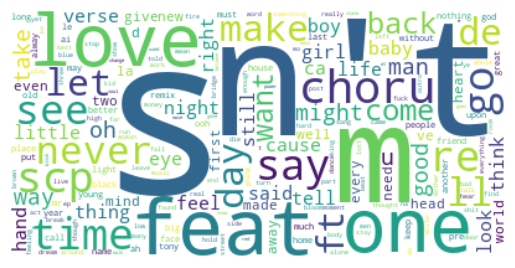

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(collocations = False, 
                      background_color = 'white').generate(' '.join(final['LyricsClean']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
final.to_csv('final2.csv')